In [1]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [2]:
# 创建有限时间内的Cagan模型的理性预期版本
CaganREE = namedtuple("CaganREE", 
                        ["m0",    # 初始货币供应
                         "μ_seq", # 货币增长率序列
                         "α",     # 敏感性参数
                         "δ",     # α/(1 + α)
                         "π_end"  # 终端预期通货膨胀率
                        ])

def create_cagan_model(m0=1, α=5, μ_seq=None):
    δ = α/(1 + α)
    π_end = μ_seq[-1]    # 计算终端预期通货膨胀率
    return CaganREE(m0, μ_seq, α, δ, π_end)

In [3]:
def solve(model, T):
    m0, π_end, μ_seq, α, δ = (model.m0, model.π_end, 
                              model.μ_seq, model.α, model.δ)
    
    # 创建矩阵表示
    A1 = np.eye(T+1, T+1) - δ * np.eye(T+1, T+1, k=1)
    A2 = np.eye(T+1, T+1) - np.eye(T+1, T+1, k=-1)

    b1 = (1-δ) * μ_seq + np.concatenate([np.zeros(T), [δ * π_end]])
    b2 = μ_seq + np.concatenate([[m0], np.zeros(T)])

    π_seq = np.linalg.solve(A1, b1)
    m_seq = np.linalg.solve(A2, b2)

    π_seq = np.append(π_seq, π_end)
    m_seq = np.append(m0, m_seq)

    p_seq = m_seq + α * π_seq

    return π_seq, m_seq, p_seq

In [4]:
T1 = 60
μ0 = 0.5
μ_star = 0
T = 80

μ_seq_1 = np.append(μ0*np.ones(T1+1), μ_star*np.ones(T-T1))

cm = create_cagan_model(μ_seq=μ_seq_1)

# solve the model
π_seq_1, m_seq_1, p_seq_1 = solve(cm, T)

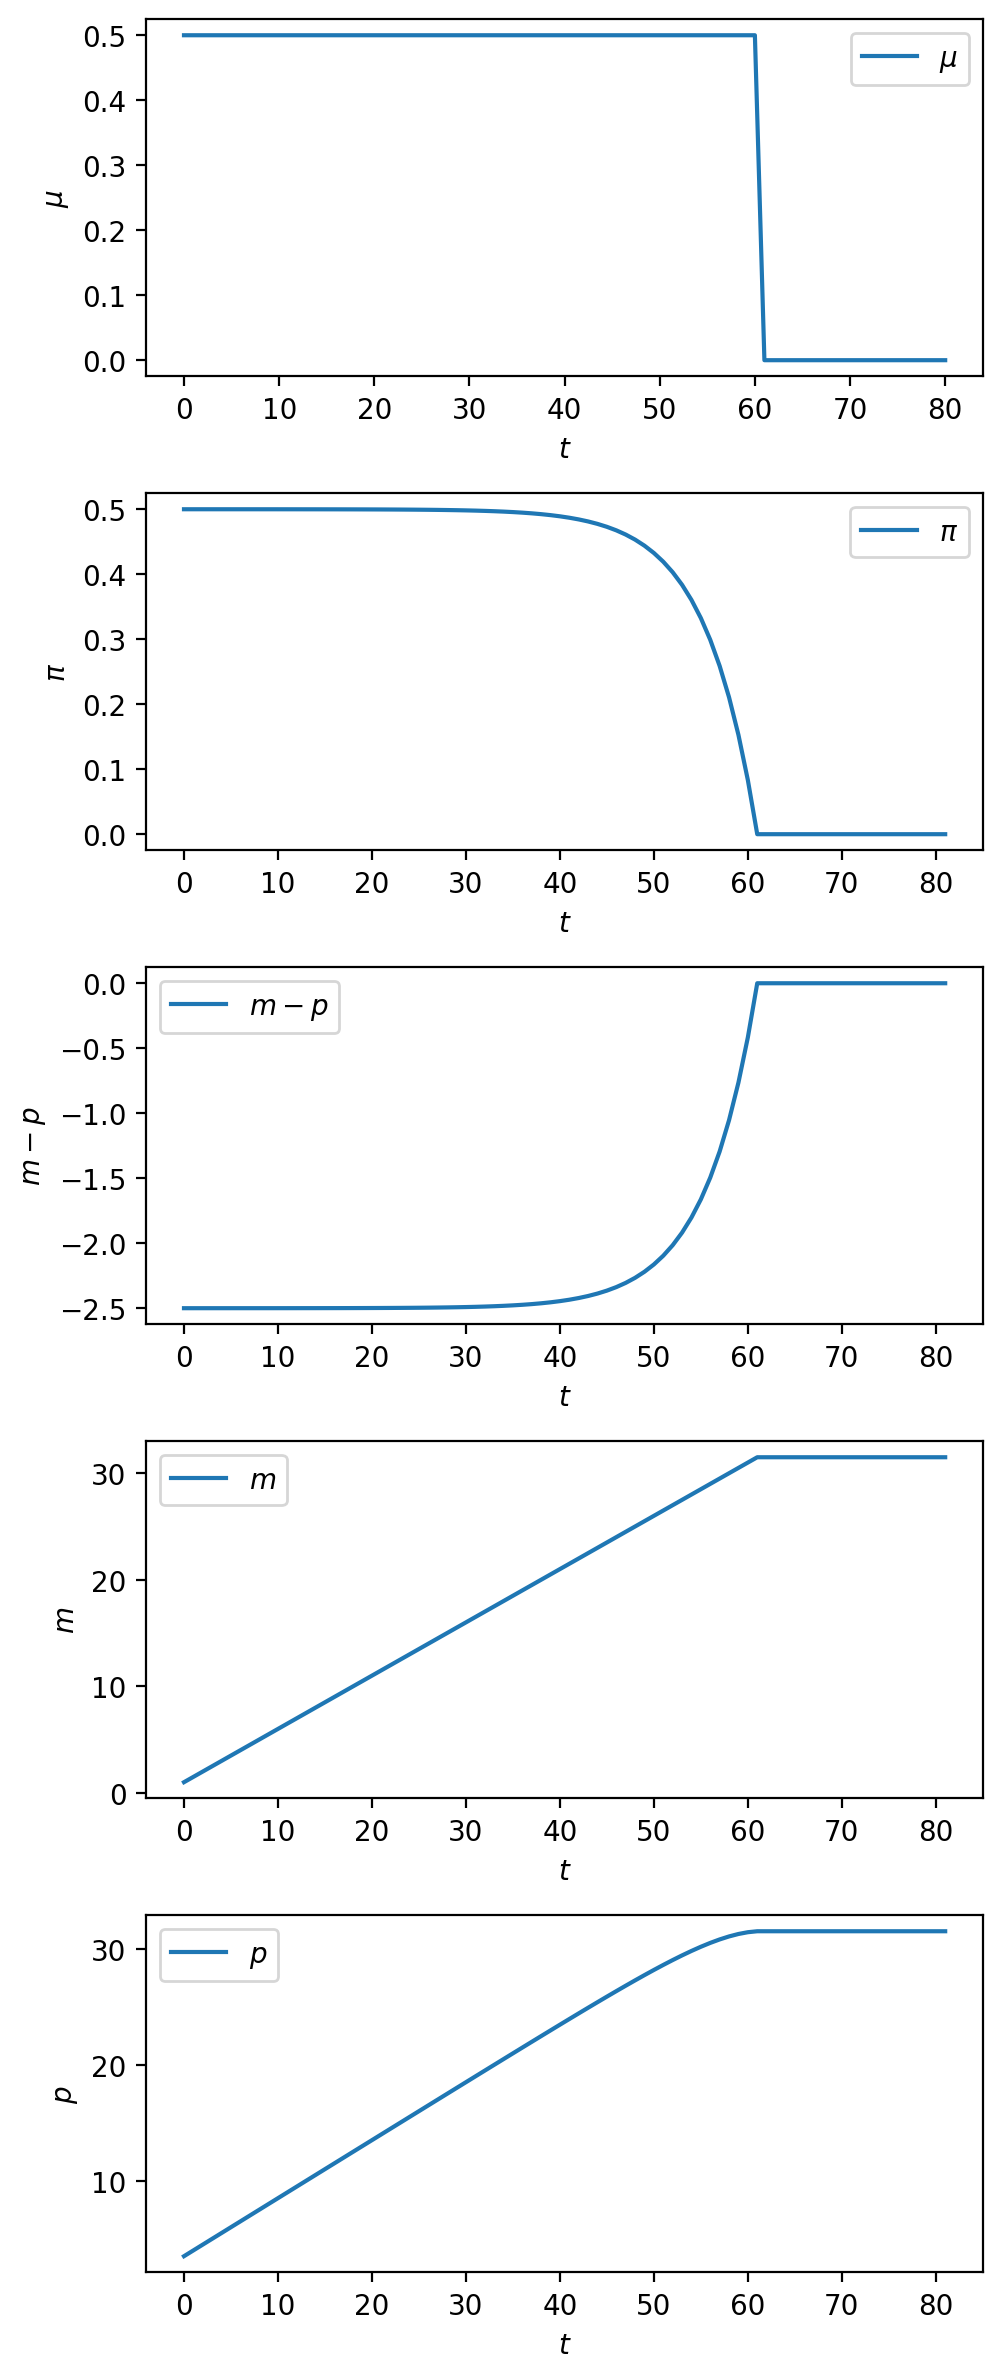

In [5]:
def plot_sequences(sequences, labels):
    fig, axs = plt.subplots(len(sequences), 1, figsize=(5, 12))
    for ax, seq, label in zip(axs, sequences, labels):
        ax.plot(range(len(seq)), seq, label=label)
        ax.set_ylabel(label)
        ax.set_xlabel('$t$')
        ax.legend()
    plt.tight_layout()
    plt.show()

sequences = (μ_seq_1, π_seq_1, m_seq_1 - p_seq_1, m_seq_1, p_seq_1)
plot_sequences(sequences, (r'$\mu$', r'$\pi$', r'$m - p$', r'$m$', r'$p$'))

In [6]:
# 路径 1
μ_seq_2_path1 = μ0 * np.ones(T+1)

cm1 = create_cagan_model(μ_seq=μ_seq_2_path1)
π_seq_2_path1, m_seq_2_path1, p_seq_2_path1 = solve(cm1, T)

# 持续路径
μ_seq_2_cont = μ_star * np.ones(T-T1)

cm2 = create_cagan_model(m0=m_seq_2_path1[T1+1], 
                         μ_seq=μ_seq_2_cont)
π_seq_2_cont, m_seq_2_cont1, p_seq_2_cont1 = solve(cm2, T-1-T1)


# 方案 1: 简单黏合 π_seq, μ_seq
μ_seq_2 = np.concatenate((μ_seq_2_path1[:T1+1],
                          μ_seq_2_cont))
π_seq_2 = np.concatenate((π_seq_2_path1[:T1+1], 
                          π_seq_2_cont))
m_seq_2_regime1 = np.concatenate((m_seq_2_path1[:T1+1], 
                                  m_seq_2_cont1))
p_seq_2_regime1 = np.concatenate((p_seq_2_path1[:T1+1], 
                                  p_seq_2_cont1))

# 方案 2: 重置 m_T1
m_T1 = (m_seq_2_path1[T1] + μ0) + cm2.α*(μ0 - μ_star)

cm3 = create_cagan_model(m0=m_T1, μ_seq=μ_seq_2_cont)
π_seq_2_cont2, m_seq_2_cont2, p_seq_2_cont2 = solve(cm3, T-1-T1)

m_seq_2_regime2 = np.concatenate((m_seq_2_path1[:T1+1], 
                                  m_seq_2_cont2))
p_seq_2_regime2 = np.concatenate((p_seq_2_path1[:T1+1],
                                  p_seq_2_cont2))

Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


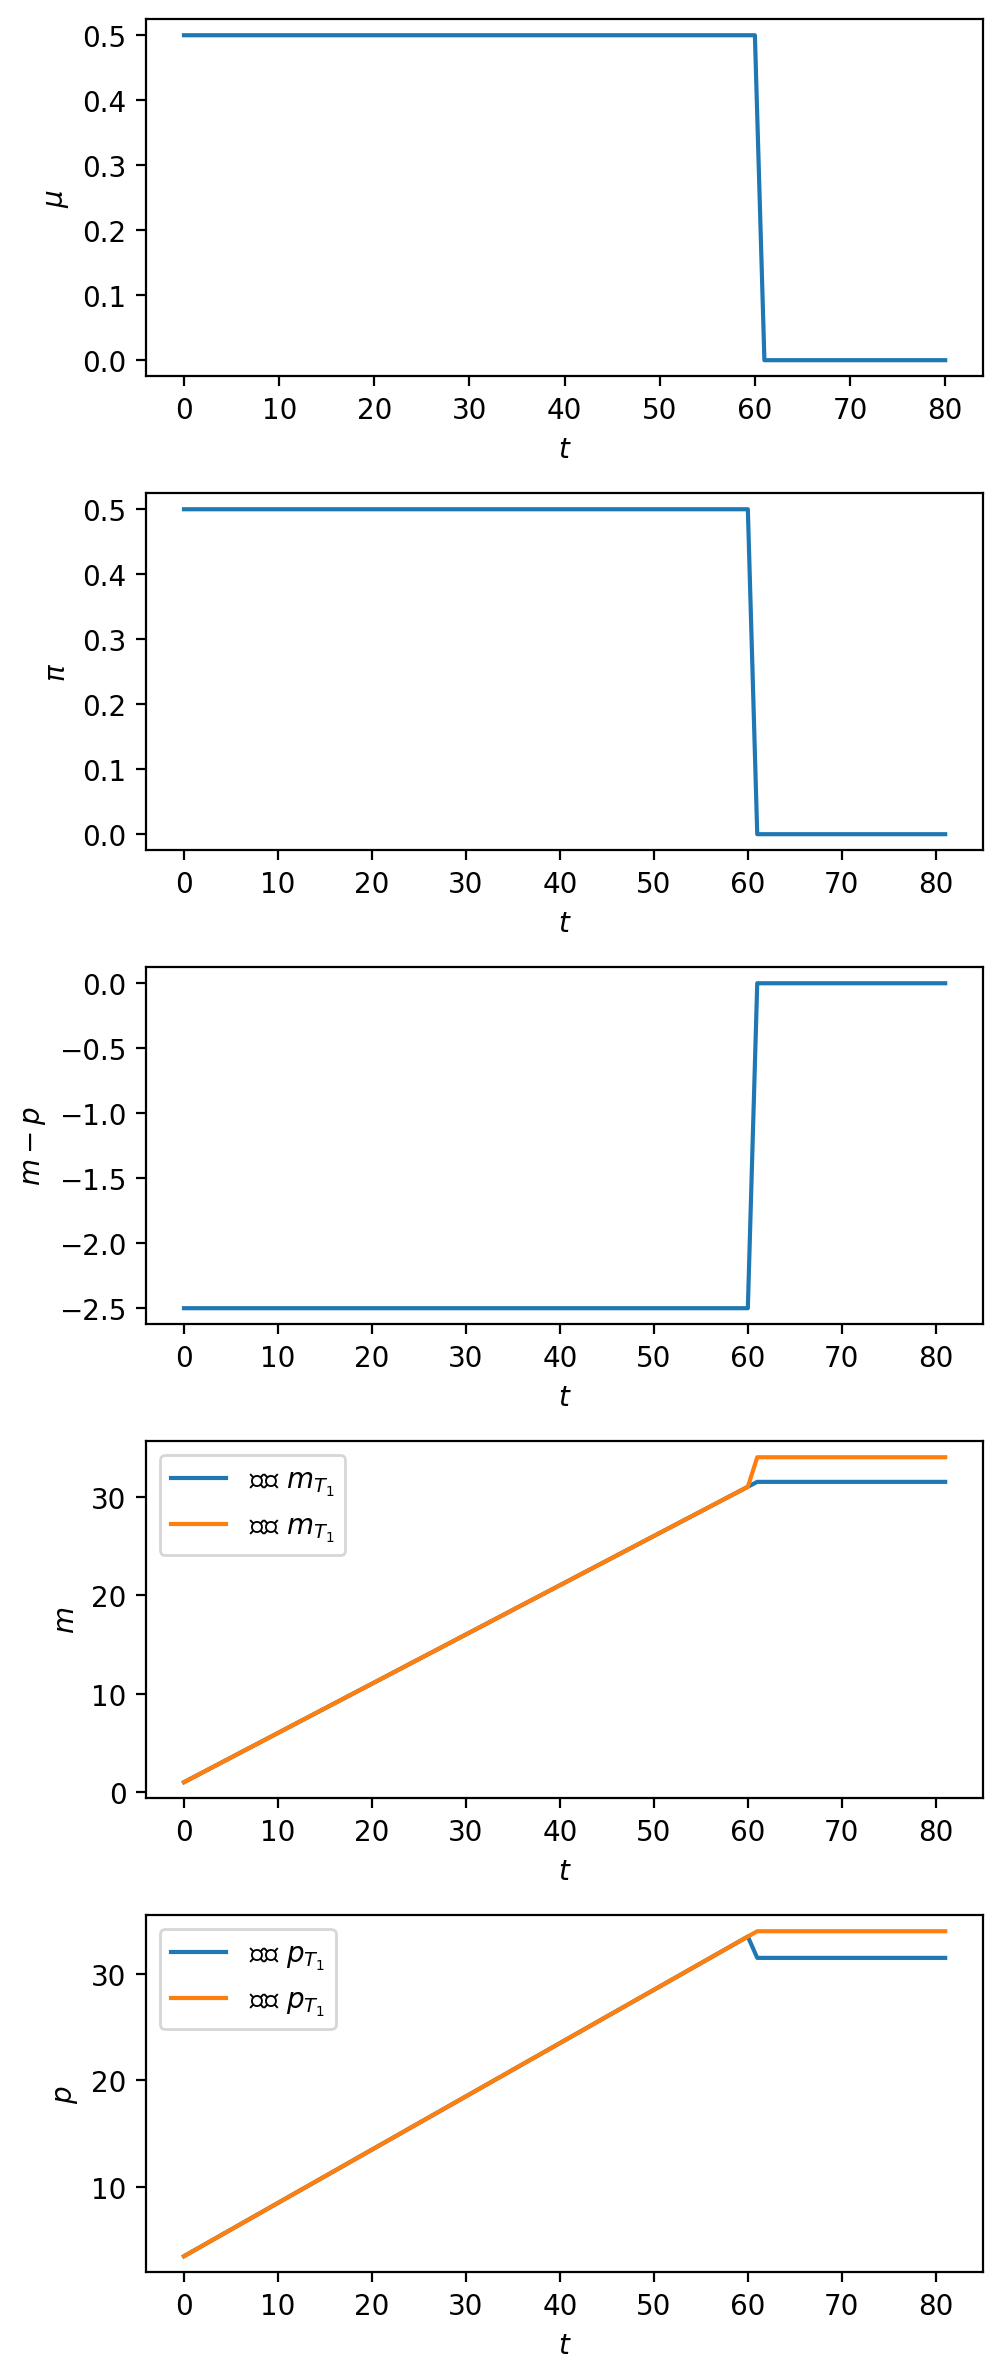

In [7]:
T_seq = range(T+2)

# 绘制两个方案的结果
fig, ax = plt.subplots(5, 1, figsize=(5, 12))

# 每个子图的配置
plot_configs = [
    {'data': [(T_seq[:-1], μ_seq_2)], 'ylabel': r'$\mu$'},
    {'data': [(T_seq, π_seq_2)], 'ylabel': r'$\pi$'},
    {'data': [(T_seq, m_seq_2_regime1 - p_seq_2_regime1)], 
     'ylabel': r'$m - p$'},
    {'data': [(T_seq, m_seq_2_regime1, '平滑 $m_{T_1}$'), 
              (T_seq, m_seq_2_regime2, '跳跃 $m_{T_1}$')], 
     'ylabel': r'$m$'},
    {'data': [(T_seq, p_seq_2_regime1, '平滑 $p_{T_1}$'), 
              (T_seq, p_seq_2_regime2, '跳跃 $p_{T_1}$')], 
     'ylabel': r'$p$'}
]

def experiment_plot(plot_configs, ax):
    # 循环每个子图配置
    for axi, config in zip(ax, plot_configs):
        for data in config['data']:
            if len(data) == 3:  # 绘制带标签以显示图例
                axi.plot(data[0], data[1], label=data[2])
                axi.legend()
            else:  # 绘制不带标签
                axi.plot(data[0], data[1])
        axi.set_ylabel(config['ylabel'])
        axi.set_xlabel(r'$t$')
    plt.tight_layout()
    plt.show()

experiment_plot(plot_configs, ax)

/tmp/ipykernel_3394578/1949648315.py:31: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3394578/1949648315.py:31: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3394578/1949648315.py:31: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3394578/1949648315.py:31: UserWarning: Glyph 35265 (\N{CJK UNIFIED IDEOGRAPH-89C1}) missing from current font.
  plt.tight_layout()


Font 'default' does not have a glyph for '\u610f' [U+610f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5916' [U+5916], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u610f' [U+610f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5916' [U+5916], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35265 (\N{CJK UNIFIED IDEOGRAPH-89C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u610f' [U+610f], substituting with a dummy sy

Font 'default' does not have a glyph for '\u5916' [U+5916], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5e73' [U+5e73], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6ed1' [U+6ed1], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u610f' [U+610f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5916' [U+5916], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8df3' [U+8df3], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8dc3' [U+8dc3], substituting with a dummy symbol.


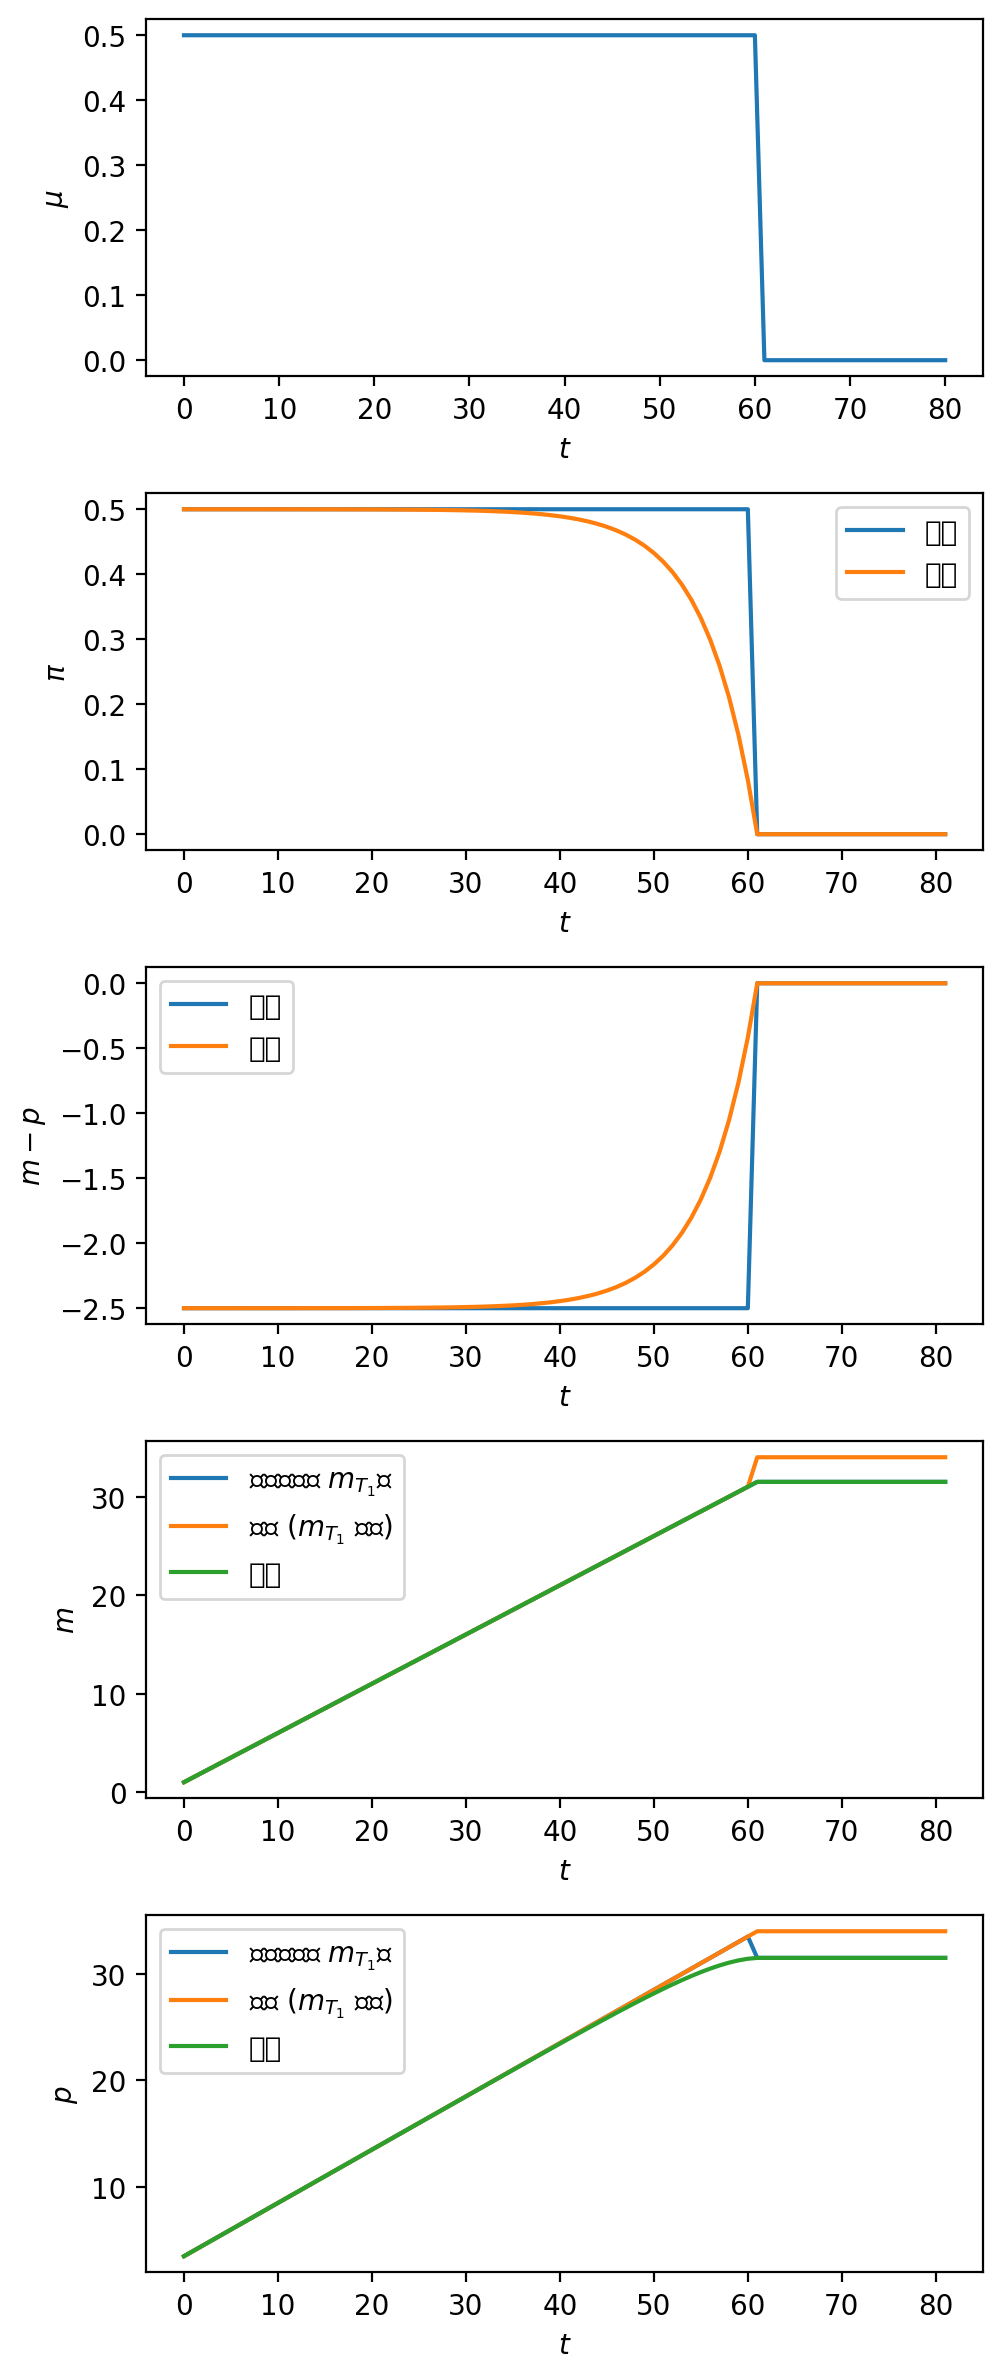

In [8]:
# compare foreseen vs unforeseen shock
fig, ax = plt.subplots(5, figsize=(5, 12))

plot_configs = [
    {'data': [(T_seq[:-1], μ_seq_2)], 'ylabel': r'$\mu$'},
    {'data': [(T_seq, π_seq_2, '意外'), 
              (T_seq, π_seq_1, '预见')], 'ylabel': r'$\pi$'},
    {'data': [(T_seq, m_seq_2_regime1 - p_seq_2_regime1, '意外'), 
              (T_seq, m_seq_1 - p_seq_1, '预见')], 'ylabel': r'$m - p$'},
    {'data': [(T_seq, m_seq_2_regime1, '意外（平滑 $m_{T_1}$）'), 
              (T_seq, m_seq_2_regime2, '意外 ($m_{T_1}$ 跳跃)'),
              (T_seq, m_seq_1, '预见')], 'ylabel': r'$m$'},   
    {'data': [(T_seq, p_seq_2_regime1, '意外（平滑 $m_{T_1}$）'), 
          (T_seq, p_seq_2_regime2, '意外 ($m_{T_1}$ 跳跃)'),
          (T_seq, p_seq_1, '预见')], 'ylabel': r'$p$'}   
]

experiment_plot(plot_configs, ax)

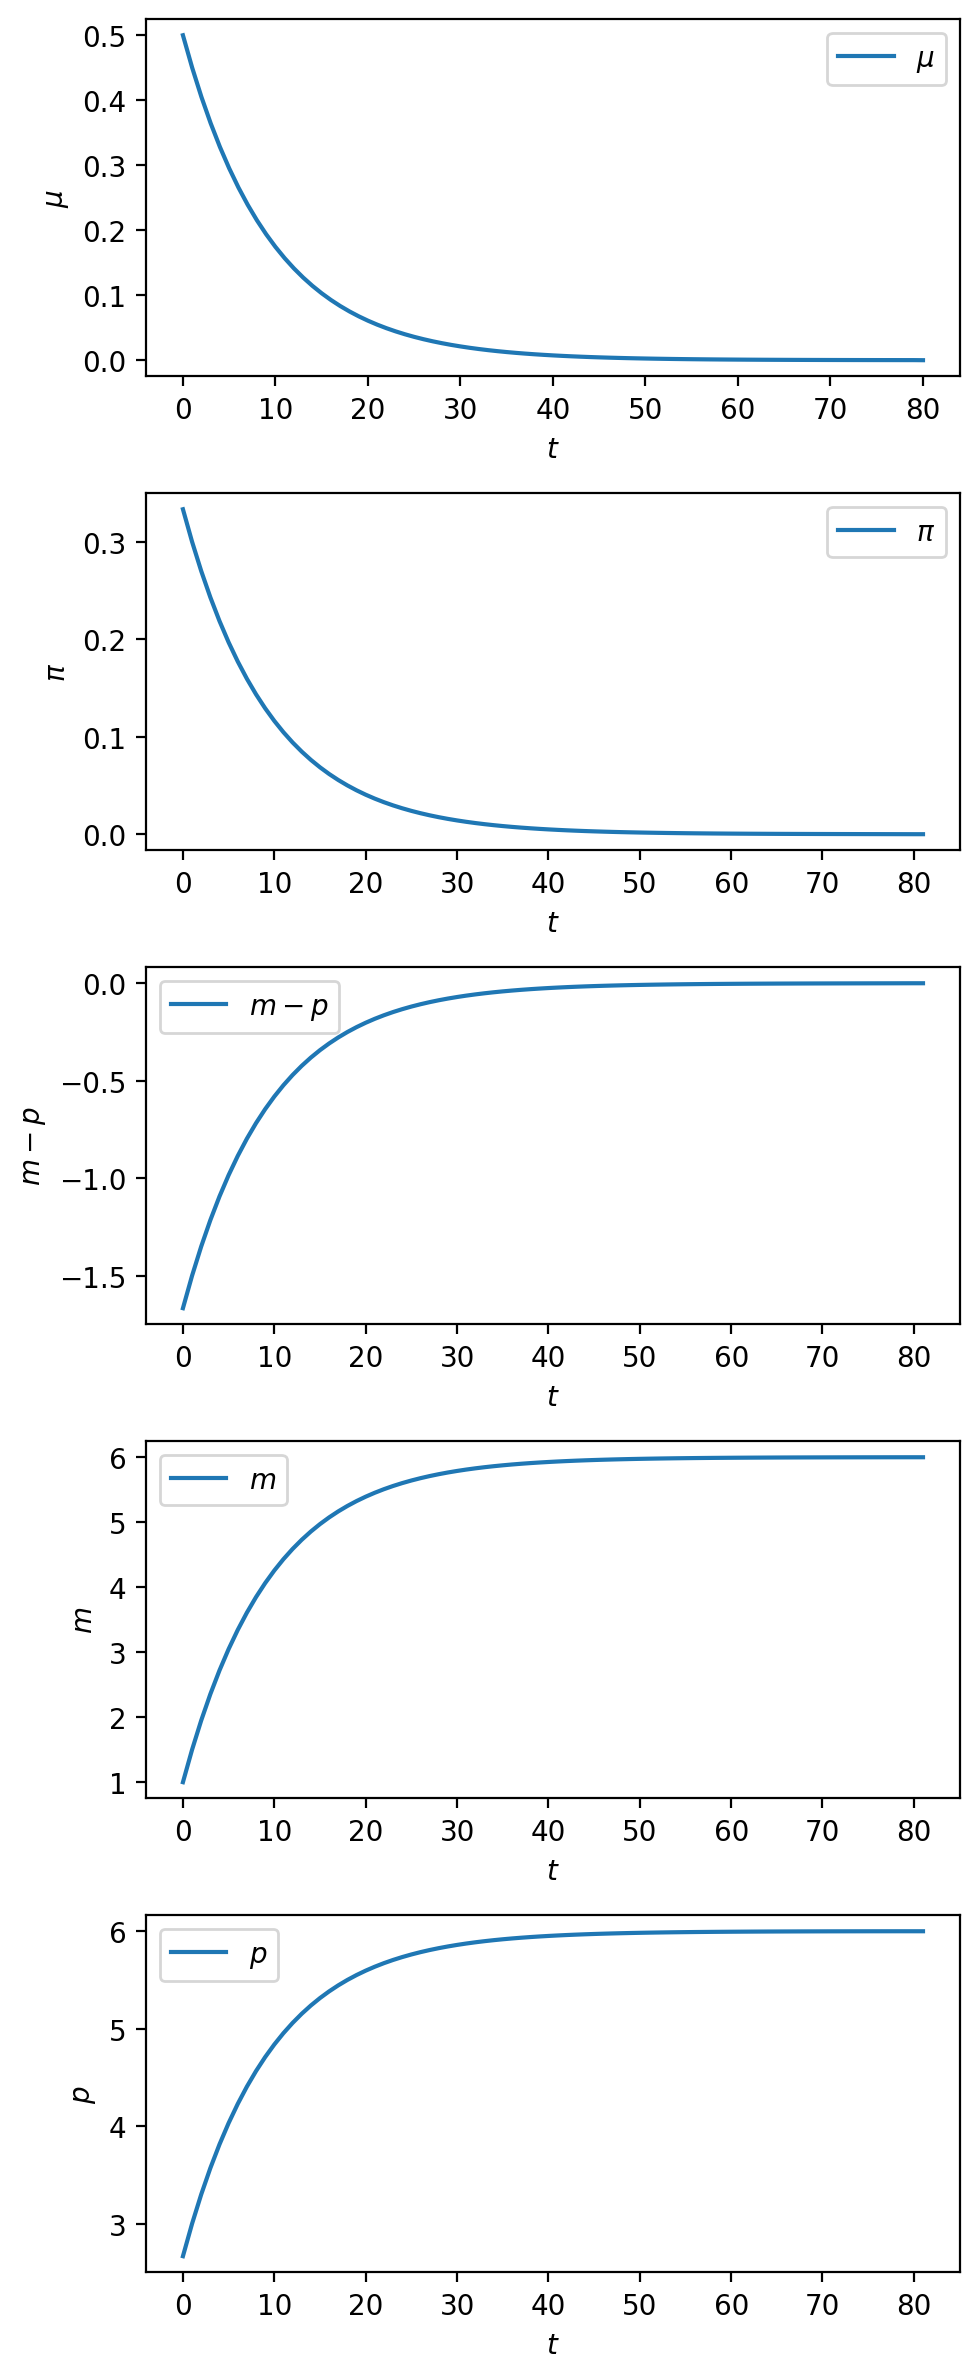

In [9]:
# 参数
ϕ = 0.9
μ_seq_stab = np.array([ϕ**t * μ0 + (1-ϕ**t)*μ_star for t in range(T)])
μ_seq_stab = np.append(μ_seq_stab, μ_star)

cm4 = create_cagan_model(μ_seq=μ_seq_stab)

π_seq_4, m_seq_4, p_seq_4 = solve(cm4, T)

sequences = (μ_seq_stab, π_seq_4, 
             m_seq_4 - p_seq_4, m_seq_4, p_seq_4)
plot_sequences(sequences, (r'$\mu$', r'$\pi$', 
                           r'$m - p$', r'$m$', r'$p$'))